In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,average_precision_score, recall_score,precision_score, f1_score, auc, roc_curve, precision_recall_curve
import time

In [12]:
class RandomForest:
    
    def __init__(self, data_path, n_estimators, selected_features, label):
        self.data_path = data_path
        self.n_estimators = n_estimators
        self.selected_features = selected_features
        self.label = label
        self.model = RandomForestClassifier(n_estimators = n_estimators, random_state=42)
    
    def _load_data(self):
        self.df = pd.read_csv(self.data_path)
        self.df['label'] = self.df['label'].apply(lambda x: x if x == 'normal.' else 'attack')
        
    def data_preparation(self):
        le = LabelEncoder()
        self.df[self.label] = le.fit_transform(self.df[self.label])
        X = self.df[self.selected_features]
        y = self.df[self.label]
        X_train, X_test, y_train, y_test = train_test_split(self.df[selected_features], self.df['label'], test_size=0.2, random_state=42)
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
    
    def train_model(self):
        t0 = time.time()
        self.model.fit(self.X_train, self.y_train)
        training_time = time.time() - t0
        
    def evaluate_model(self):
        self.y_pred = self.model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, self.y_pred)
        conf_matrix = confusion_matrix(self.y_test, self.y_pred)
        f1 = f1_score(self.y_test, self.y_pred, average='weighted')
        class_report = classification_report(self.y_test, self.y_pred)
        return accuracy, conf_matrix, f1, class_report

In [13]:
selected_features = ['dst_host_same_src_port_rate',
 'is_guest_login',
 'num_failed_logins',
 'dst_host_diff_srv_rate',
 'rerror_rate',
 'logged_in',
 'serror_rate',
 'same_srv_rate',
 'protocol_type_0',
'protocol_type_1', 
 'dst_host_srv_diff_host_rate']

In [14]:
instance = RandomForest("../../../transformed_datasets/transformed_KDD_CUPP99_2.csv", 100, selected_features, 'label')

In [15]:
instance._load_data()

In [16]:
instance.data_preparation()

In [17]:
instance.train_model()

In [21]:
instance.evaluate_model()

(0.9964232391778567,
 array([[ 51962,    494],
        [   275, 162268]]),
 0.9964207021527355,
 '              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99     52456\n           1       1.00      1.00      1.00    162543\n\n    accuracy                           1.00    214999\n   macro avg       1.00      0.99      1.00    214999\nweighted avg       1.00      1.00      1.00    214999\n')

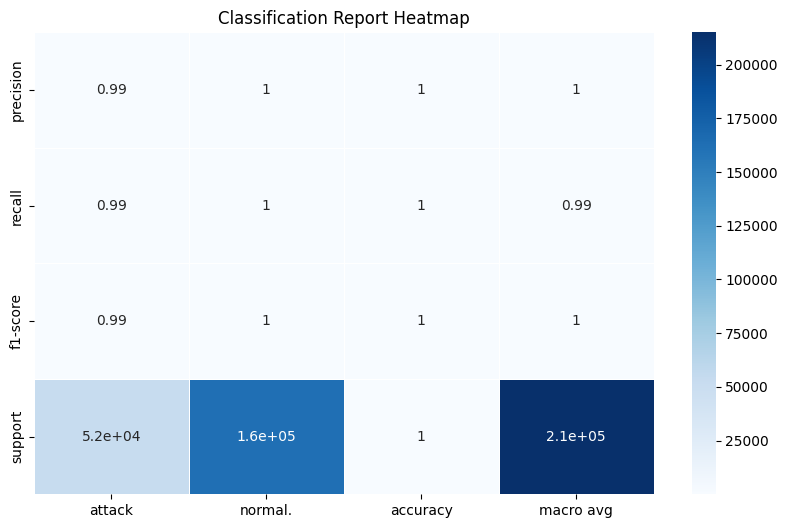

In [38]:
report = classification_report(instance.y_test, instance.y_pred, 
    target_names=['attack', 'normal.'], 
    output_dict=True
)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', linewidths=0.5)

plt.title('Classification Report Heatmap')
plt.show()

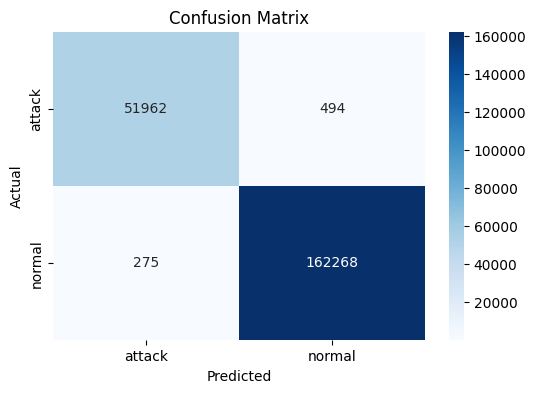

In [42]:
cm = confusion_matrix(instance.y_test, instance.y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['attack', 'normal'], yticklabels=['attack', 'normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
y_pred_proba = instance.model.predict_proba(instance.X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(instance.y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

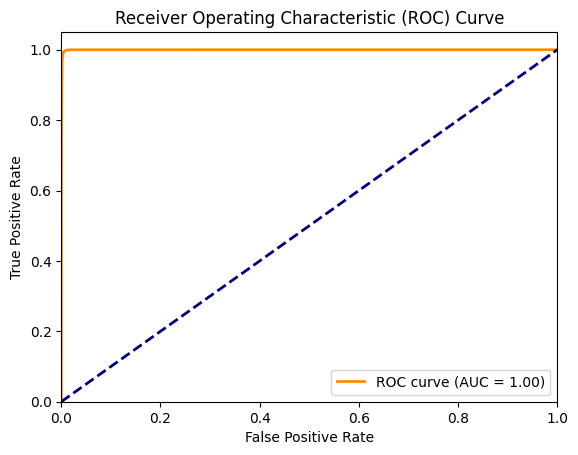

In [19]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [22]:
report = classification_report(instance.y_test, instance.y_pred, output_dict=True)

In [23]:
rep_df = pd.DataFrame(report).transpose()

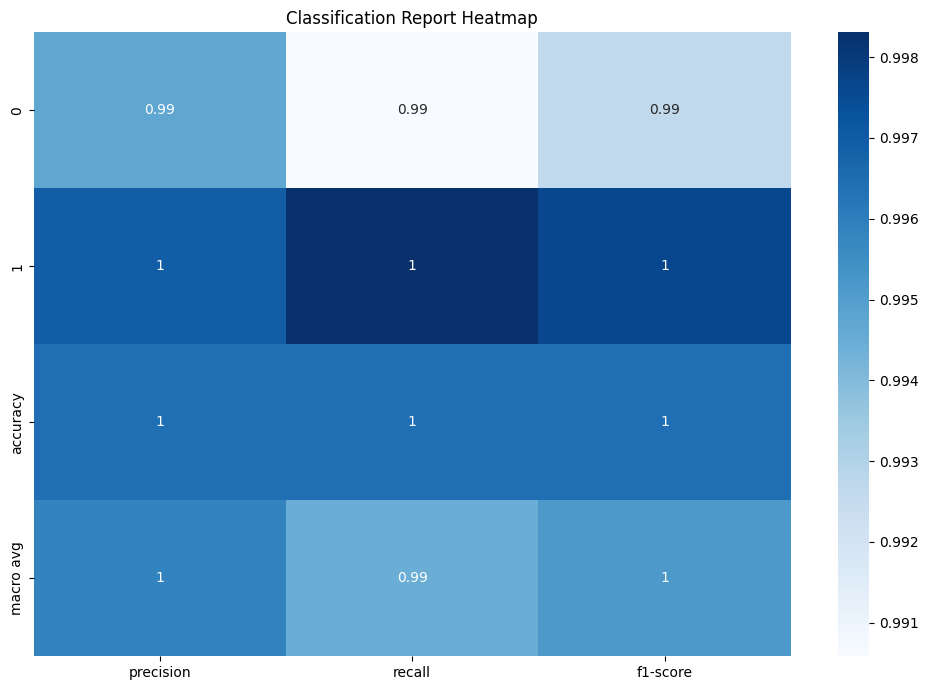

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(rep_df.iloc[:-1, :-1].astype(float), annot=True, cmap="Blues")
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.show()

In [26]:
precision, recall, thresholds = precision_recall_curve(instance.y_test, y_pred_proba)

In [27]:
average_precision = average_precision_score(instance.y_test, y_pred_proba)

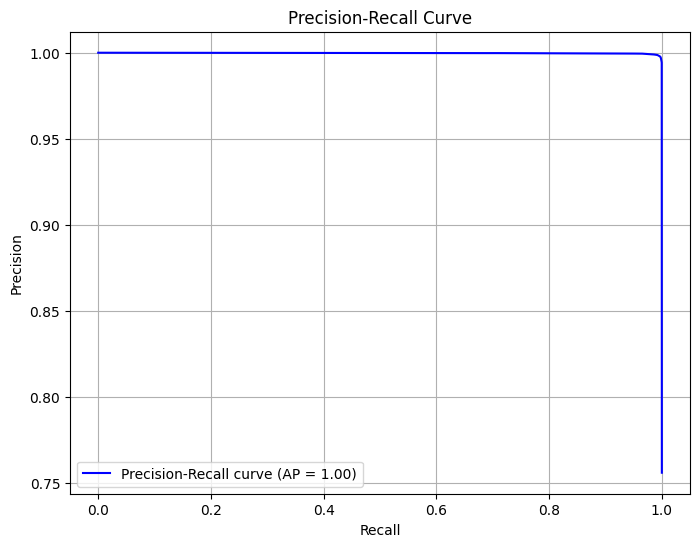

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)